## **Modelos de Regresión Lineal**

In [7]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.0/11.0 MB 326.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/11.0 MB 656.4 kB/s eta 0:00:17
    --------------------------------------- 0.1/11.0 MB 655.8 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.0 MB 573.4 kB/s eta 0:00:19
    --------------------------------------- 0.2/11.0 MB 801.7 kB/s eta 0:00:14
   - -------------------------------------- 0.3/11.0 MB 896.4 kB/s eta 0:00:12
   - -------------------------------------- 0.3/11.0 MB 873.8 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/11.0 MB 1.6 MB/s eta 0:00:


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd # Dataframes
import numpy as np # Arreglos y matrices
import scipy.stats as stats 
import matplotlib.pyplot as plt # Graficos
import seaborn as sns  # para análisis gráficos
import random # para generar aleatorios

Información del atributo (en orden):

Los datos del precio de la vivienda de Boston se han utilizado en muchos documentos de aprendizaje automático que abordan la regresión

- **CRIM**: tasa de criminalidad per cápita por ciudad
- **ZN**: proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
- **INDUS**: proporción de acres de negocios no minoristas por ciudad
- **CHAS**: variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
- **NOX**: concentración de óxidos nítricos (partes por 10 millones)
- **RM**: número medio de habitaciones por vivienda
- **EDAD**: proporción de unidades ocupadas por el propietario construidas antes de 1940
- **DIS**: distancias ponderadas a cinco centros de empleo de Boston
- **RAD**: índice de accesibilidad a autopistas radiales
- **IMPUESTO**: tasa impositiva sobre el valor total de la propiedad por 10,000
- **PTRATIO**: relación alumno-profesor por localidad
- **B**: 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
- **LSTAT**:% menor estado de la población
- **MEDV**: valor medio de viviendas ocupadas por el propietario en $ 1000


### 1. Carga de datos

In [4]:
# uploaded = files.upload()

ruta_path_sh = 'C:/cesar_quezada/ProyectosIA/Proyectos_PALMAS/PROYECTO_01_analitica_descriptiva_TEA/data/processed/Calidad de racimos vs TEA'
df_regresion_sh= pd.read_excel(ruta_path_sh + '/__bbdd_revision__SHANUSI.xlsx', sheet_name='data')
df_regresion_sh.head()

,FECHA,TEA_total,RFFProcesado,RFFProcesadoPropios,RFFProcesadoTerceros,CPOObtenido,% Peso_VERDES_ propios,% Peso_MADUROS_ propios,% Peso_SMADUROS_ propios,% Peso_ESCOBAJO_ propios,% Peso_MALFORMADOA_ propios,% Peso_MALFORMADOB_ propios,% Peso_VERDES_ terceros,% Peso_MADUROS_ terceros,% Peso_SMADUROS_ terceros,% Peso_ESCOBAJO_ terceros,% Peso_MALFORMADO_ terceros
0,2023-03-13,0.235963,5813.999,5321.459,492.54,1371.886,0.027311,0.812969,0.077818,0.000000,0.001122,0.005238,0.000067,0.079520,0.002216,0.000099,0.000077
1,2023-03-20,0.236822,3104.499,2744.489,360.01,735.214,0.008836,0.754446,0.127637,0.000000,0.006300,0.004991,0.000139,0.103457,0.004470,0.001015,0.000232
2,2023-03-27,0.231031,5022.049,4639.879,382.17,1160.251,0.007948,0.760040,0.165869,0.000000,0.038905,0.015897,0.000047,0.061676,0.003832,0.000588,0.001316
3,2023-04-03,0.223784,3779.589,3546.189,233.40,845.813,0.008903,0.789705,0.154705,0.000000,0.042218,0.027093,0.000152,0.043337,0.002882,0.000315,0.001187
4,2023-04-10,0.237116,5058.020,4581.000,477.02,1199.336,0.007529,0.784098,0.148010,0.010626,0.047788,0.045812,0.000051,0.047031,0.002594,0.000061,0.001355


In [5]:
df_regresion_sh = df_regresion_sh.drop(['FECHA'],axis = 1)
df_regresion_sh.head()

,TEA_total,RFFProcesado,RFFProcesadoPropios,RFFProcesadoTerceros,CPOObtenido,% Peso_VERDES_ propios,% Peso_MADUROS_ propios,% Peso_SMADUROS_ propios,% Peso_ESCOBAJO_ propios,% Peso_MALFORMADOA_ propios,% Peso_MALFORMADOB_ propios,% Peso_VERDES_ terceros,% Peso_MADUROS_ terceros,% Peso_SMADUROS_ terceros,% Peso_ESCOBAJO_ terceros,% Peso_MALFORMADO_ terceros
0,0.235963,5813.999,5321.459,492.54,1371.886,0.027311,0.812969,0.077818,0.000000,0.001122,0.005238,0.000067,0.079520,0.002216,0.000099,0.000077
1,0.236822,3104.499,2744.489,360.01,735.214,0.008836,0.754446,0.127637,0.000000,0.006300,0.004991,0.000139,0.103457,0.004470,0.001015,0.000232
2,0.231031,5022.049,4639.879,382.17,1160.251,0.007948,0.760040,0.165869,0.000000,0.038905,0.015897,0.000047,0.061676,0.003832,0.000588,0.001316
3,0.223784,3779.589,3546.189,233.40,845.813,0.008903,0.789705,0.154705,0.000000,0.042218,0.027093,0.000152,0.043337,0.002882,0.000315,0.001187
4,0.237116,5058.020,4581.000,477.02,1199.336,0.007529,0.784098,0.148010,0.010626,0.047788,0.045812,0.000051,0.047031,0.002594,0.000061,0.001355


### 2. Regresión lineal simple

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Analisis de correlación

In [9]:
vivienda = df_regresion_sh

In [10]:
# Antes de poder realizar el modelo de regresión lineal debemos ver si existe asociación y de qué tipo es.
# coeficiente de correlación
vivienda.corr()

,TEA_total,RFFProcesado,RFFProcesadoPropios,RFFProcesadoTerceros,CPOObtenido,% Peso_VERDES_ propios,% Peso_MADUROS_ propios,% Peso_SMADUROS_ propios,% Peso_ESCOBAJO_ propios,% Peso_MALFORMADOA_ propios,% Peso_MALFORMADOB_ propios,% Peso_VERDES_ terceros,% Peso_MADUROS_ terceros,% Peso_SMADUROS_ terceros,% Peso_ESCOBAJO_ terceros,% Peso_MALFORMADO_ terceros
TEA_total,1.000000,-0.370760,-0.431799,0.351940,-0.217938,-0.279292,-0.094659,-0.290596,-0.143151,-0.194205,-0.301282,0.413542,0.468586,0.452097,0.448258,0.067058
RFFProcesado,-0.370760,1.000000,0.991369,0.308084,0.986179,-0.206584,0.470769,-0.203566,-0.024389,-0.028489,-0.104453,-0.366353,-0.221222,-0.515750,-0.371960,-0.485782
RFFProcesadoPropios,-0.431799,0.991369,1.000000,0.180702,0.967621,-0.132853,0.469512,-0.124632,0.021777,0.012791,-0.019291,-0.443786,-0.324986,-0.567440,-0.433351,-0.468881
RFFProcesadoTerceros,0.351940,0.308084,0.180702,1.000000,0.376731,-0.585755,0.124675,-0.622767,-0.340995,-0.306549,-0.643644,0.471987,0.698688,0.248505,0.354207,-0.241881
CPOObtenido,-0.217938,0.986179,0.967621,0.376731,1.000000,-0.257507,0.471132,-0.248955,-0.039848,-0.061573,-0.156282,-0.325999,-0.162882,-0.470697,-0.324704,-0.501571
% Peso_VERDES_ propios,-0.279292,-0.206584,-0.132853,-0.585755,-0.257507,1.000000,-0.155539,0.333652,0.055842,0.057575,0.471360,-0.327365,-0.339369,-0.076115,-0.208795,0.193158
% Peso_MADUROS_ propios,-0.094659,0.470769,0.469512,0.124675,0.471132,-0.155539,1.000000,-0.665398,-0.097886,0.288505,0.126073,-0.166492,-0.294298,-0.426907,-0.320149,-0.124701
% Peso_SMADUROS_ propios,-0.290596,-0.203566,-0.124632,-0.622767,-0.248955,0.333652,-0.665398,1.000000,0.333576,0.023354,0.256105,-0.257330,-0.505681,-0.121292,-0.204682,0.026296
% Peso_ESCOBAJO_ propios,-0.143151,-0.024389,0.021777,-0.340995,-0.039848,0.055842,-0.097886,0.333576,1.000000,0.390797,0.458847,-0.128007,-0.410097,-0.232816,-0.323463,0.256815
% Peso_MALFORMADOA_ propios,-0.194205,-0.028489,0.012791,-0.306549,-0.061573,0.057575,0.288505,0.023354,0.390797,1.000000,0.732105,-0.200155,-0.402122,-0.253356,-0.284778,0.203978


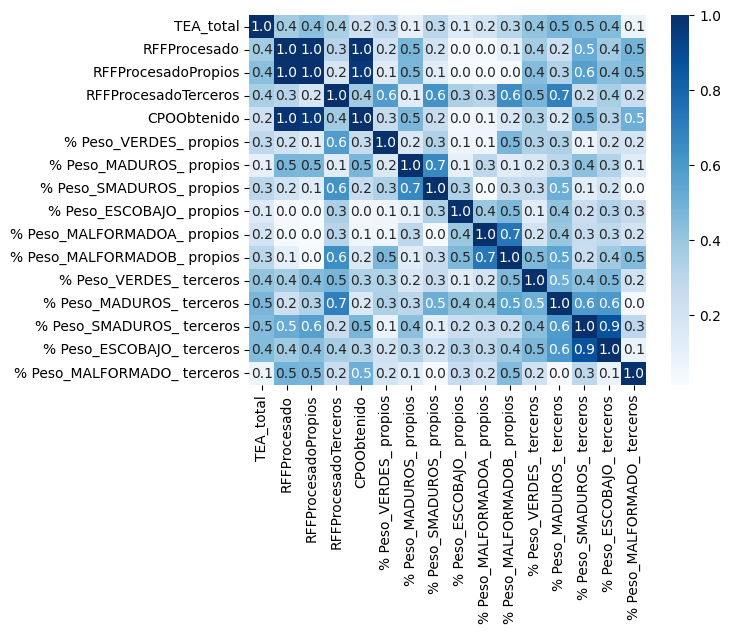

In [11]:
# Gráfico de calor de correlaciones
sns.heatmap(abs(vivienda.corr()), annot=True, fmt='.1f', cmap='Blues')
plt.show()

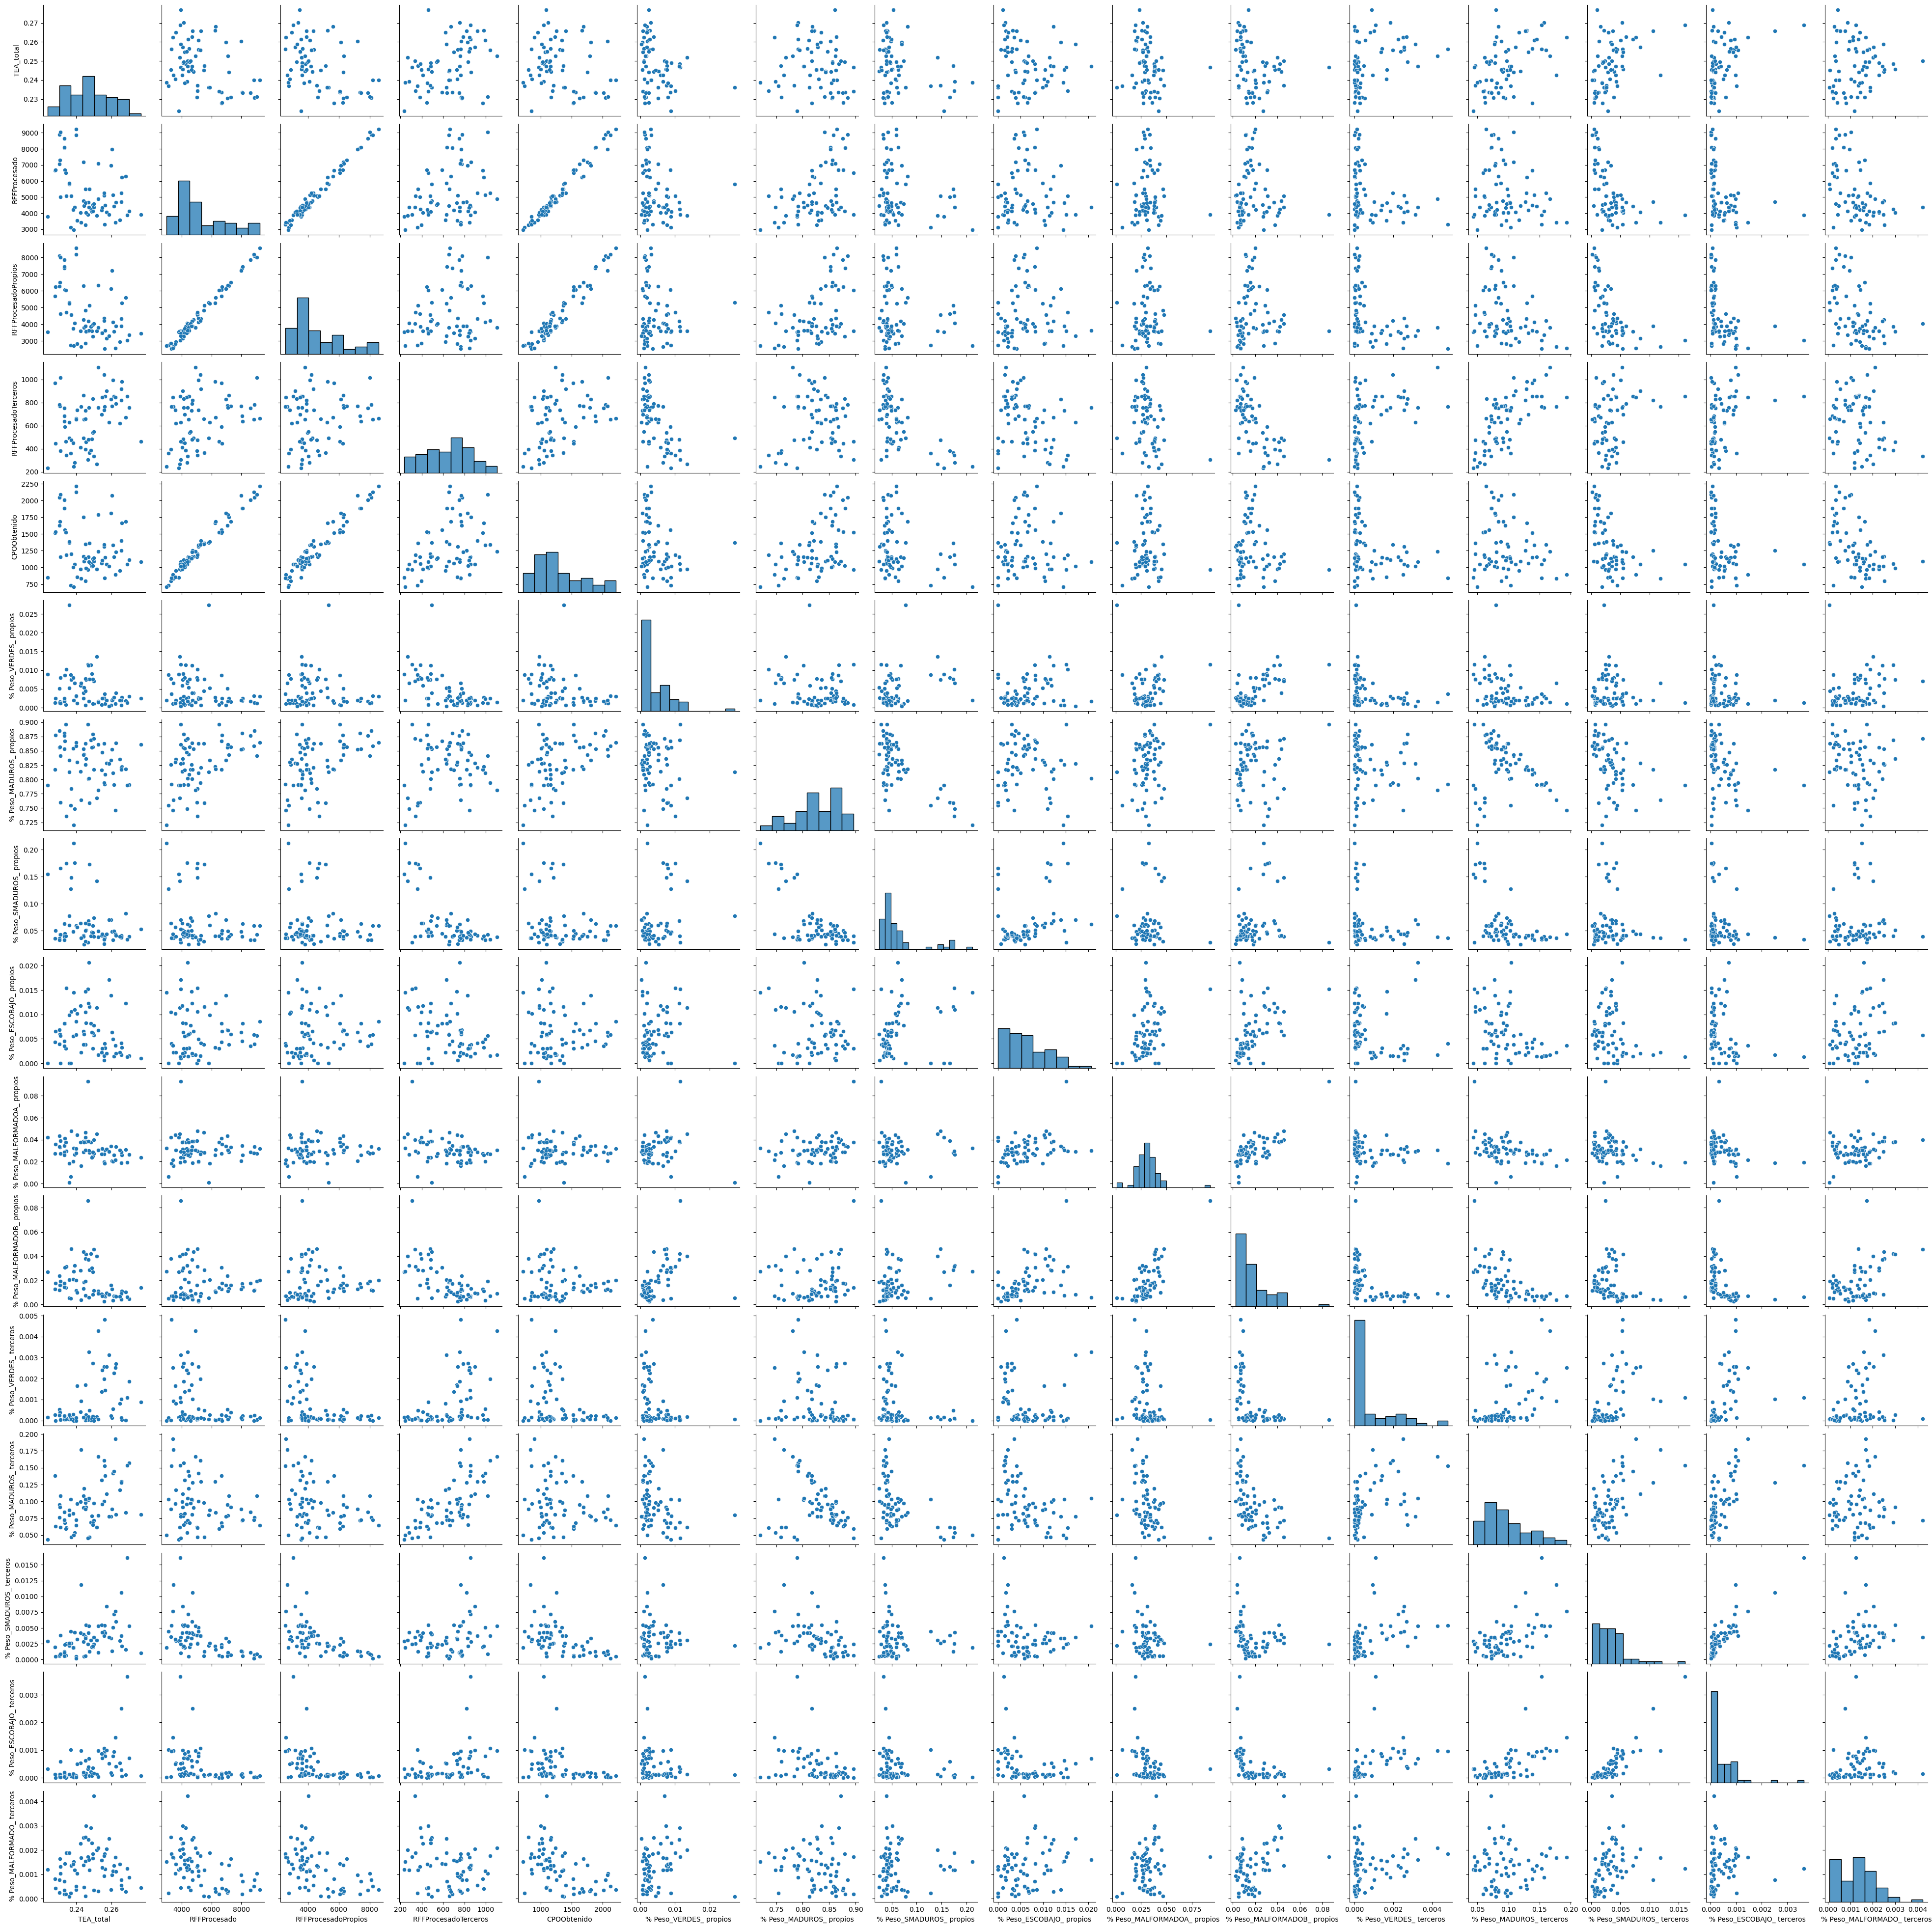

In [12]:
# Gráfico de dispersión multiple
par= sns.pairplot(vivienda)

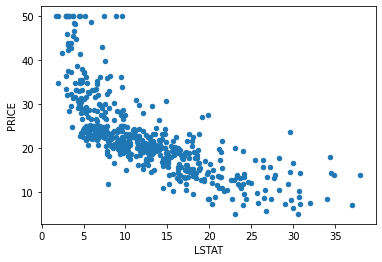

In [10]:
# diagrama de dispersión
disp= vivienda.plot(kind='scatter', x='LSTAT', y='PRICE')

### 3. Regresión lineal múltiple

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
vivienda.columns

Index(['TEA_total', 'RFFProcesado', 'RFFProcesadoPropios',
       'RFFProcesadoTerceros', 'CPOObtenido', '% Peso_VERDES_ propios',
       '% Peso_MADUROS_ propios', '% Peso_SMADUROS_ propios',
       '% Peso_ESCOBAJO_ propios', '% Peso_MALFORMADOA_ propios',
       '% Peso_MALFORMADOB_ propios', '% Peso_VERDES_ terceros',
       '% Peso_MADUROS_ terceros', '% Peso_SMADUROS_ terceros',
       '% Peso_ESCOBAJO_ terceros', '% Peso_MALFORMADO_ terceros'],
      dtype='object')

In [15]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X = vivienda.drop("TEA_total",axis=1) # covariables
Y = vivienda['TEA_total'] # target

In [16]:
# Creamos nuestro set de datos
random.seed(123)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [17]:
# Creamos nuestro modelo general de regresión lineal múltiple
lrm = LinearRegression()

In [18]:
# Ajustamos nuestro modelo a nuestra base train
lrm_model = lrm.fit(X_train, Y_train)

In [19]:
# Mostramos los coeficientes del modelo
intercepto_m = lrm_model.intercept_
coeficiente_m = lrm_model.coef_

In [20]:
print("El núnero de coeficientes es :")
len(lrm_model.coef_)

El núnero de coeficientes es :


15

In [21]:
# Podemos observar todos los coeficientes asignados con sus nombres
coef=pd.DataFrame(lrm_model.coef_,X.columns)
coef

,0
RFFProcesado,-0.000031
RFFProcesadoPropios,-0.000011
RFFProcesadoTerceros,-0.000020
CPOObtenido,0.000175
% Peso_VERDES_ propios,-0.636942
% Peso_MADUROS_ propios,-0.266357
% Peso_SMADUROS_ propios,-0.295018
% Peso_ESCOBAJO_ propios,-0.429880
% Peso_MALFORMADOA_ propios,-0.069447
% Peso_MALFORMADOB_ propios,0.104050


In [22]:
# Obtenemos las predicciones
X_pred_m = lrm_model.predict(X_train)
Y_pred_m = lrm_model.predict(X_test)

In [60]:
Y_pred[:5]

array([22.40393254, 24.55733865, 21.31336635, 14.51119082, 12.81988902])

In [23]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_m))
print('Test:',mean_squared_error(Y_test, Y_pred_m))

Error cuadrático medio:
Train: 6.01666716598287e-06
Test: 1.1281147233001545e-05


In [24]:
print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_m)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_m)))

Raiz Error cuadrático medio:
Train: 0.002452889554379257
Test: 0.003358741912234631


In [25]:
print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_m))
print('Test:',r2_score(Y_test, Y_pred_m))

R cuadrado:
Train: 0.9612898564003078
Test: 0.9180660798954248


### 4. Regresión Penalizada : Ridge

In [26]:
from sklearn.preprocessing import scale  
from sklearn.model_selection import train_test_split # Partición muestral
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [32]:
# Creamos un vector con los valores de alpha o constante de penalización
alphas = 10**np.linspace(10,-1,100)*0.5
print(alphas.shape)
print(alphas[:10])

(100,)
[5.00000000e+09 3.87131841e+09 2.99742125e+09 2.32079442e+09
 1.79690683e+09 1.39127970e+09 1.07721735e+09 8.34050269e+08
 6.45774833e+08 5.00000000e+08]


In [27]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X = vivienda.drop("TEA_total",axis=1) # covariables
Y = vivienda['TEA_total'] # target

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Normaliza los datos manualmente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Generamos el ajuste de las regresiones para cada valor de alpha
ridge = Ridge()
coefs = []
# Itera sobre los valores de alpha
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_scaled, Y)
    coefs.append(ridge.coef_)
    
print(np.shape(coefs))
coefs


(100, 15)


[array([-6.19660978e-11, -7.21676809e-11,  5.88207107e-11, -3.64245832e-11,
        -4.66788710e-11, -1.58205535e-11, -4.85681043e-11, -2.39252219e-11,
        -3.24580011e-11, -5.03539900e-11,  6.91163881e-11,  7.83160507e-11,
         7.55601395e-11,  7.49185004e-11,  1.12075712e-11]),
 array([-8.00322916e-11, -9.32081426e-11,  7.59698679e-11, -4.70441572e-11,
        -6.02880794e-11, -2.04330298e-11, -6.27281181e-11, -3.09006114e-11,
        -4.19211195e-11, -6.50346776e-11,  8.92672462e-11,  1.01149067e-10,
         9.75896710e-11,  9.67609623e-11,  1.44751344e-11]),
 array([-1.03365677e-10, -1.20382943e-10,  9.81188553e-11, -6.07598635e-11,
        -7.78650474e-11, -2.63902714e-11, -8.10164785e-11, -3.99096728e-11,
        -5.41432063e-11, -8.39955138e-11,  1.15293079e-10,  1.30639040e-10,
         1.26041904e-10,  1.24971585e-10,  1.86953543e-11]),
 array([-1.33501902e-10, -1.55480545e-10,  1.26725371e-10, -7.84743783e-11,
        -1.00566574e-10, -3.40843440e-11, -1.04636803e-10

Text(0, 0.5, 'weights')

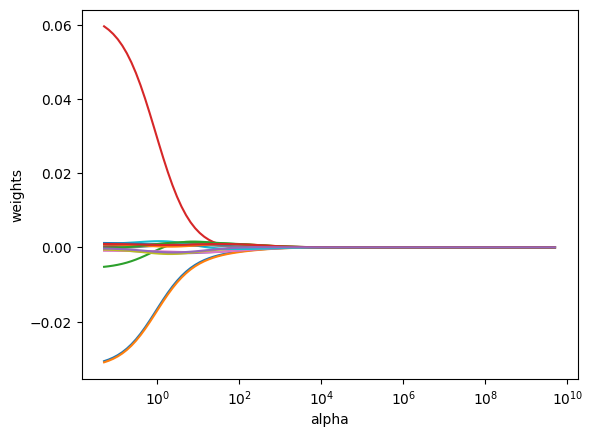

In [35]:
# Graficamos los valores de alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [38]:
# Dividimos o partimos la data en train y test
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [40]:
# Normaliza los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Le asignamos un valor pequeño a alpha y observamos que pasa con el error en el test
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train_scaled, Y_train)            # Ajustamos el modelo ridge

Ridge(alpha=0.001)

In [42]:
# print(pd.Series(ridge.coef_, index = X.columns).sort_values(ascending=False)) # Pintamos los coeficientes
print(pd.Series(ridge.coef_, index = X.columns)) # Pintamos los coeficientes

RFFProcesado                  -0.031716
RFFProcesadoPropios           -0.032426
RFFProcesadoTerceros          -0.006501
CPOObtenido                    0.063798
% Peso_VERDES_ propios        -0.000673
% Peso_MADUROS_ propios        0.000184
% Peso_SMADUROS_ propios      -0.000732
% Peso_ESCOBAJO_ propios      -0.000513
% Peso_MALFORMADOA_ propios   -0.001229
% Peso_MALFORMADOB_ propios    0.002049
% Peso_VERDES_ terceros        0.001231
% Peso_MADUROS_ terceros       0.000964
% Peso_SMADUROS_ terceros     -0.000698
% Peso_ESCOBAJO_ terceros      0.001118
% Peso_MALFORMADO_ terceros   -0.000331
dtype: float64


In [43]:
# Obtenemos las predicciones
X_pred_rg = ridge.predict(X_train_scaled)
Y_pred_rg = ridge.predict(X_test_scaled)

In [44]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_rg))
print('Test:',mean_squared_error(Y_test, Y_pred_rg),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_rg)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_rg)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_rg))
print('Test:',r2_score(Y_test, Y_pred_rg))

Error cuadrático medio:
Train: 5.565428450977091e-06
Test: 1.3164926806900329e-05 

Raiz Error cuadrático medio:
Train: 0.0023591160316900673
Test: 0.003628350425041706 

R cuadrado:
Train: 0.9562744148068262
Test: 0.9317945399247358


In [45]:
# Le asignamos un valor grande a alpha y observamos que pasa con el error en el test
ridge2 = Ridge(alpha = 10)
ridge2.fit(X_train_scaled, Y_train)             # Ajuste del modelo ridge

Ridge(alpha=10)

In [46]:
print(pd.Series(ridge2.coef_, index = X.columns)) 

RFFProcesado                  -0.002849
RFFProcesadoPropios           -0.003096
RFFProcesadoTerceros           0.000536
CPOObtenido                    0.002670
% Peso_VERDES_ propios        -0.001545
% Peso_MADUROS_ propios        0.001071
% Peso_SMADUROS_ propios      -0.001304
% Peso_ESCOBAJO_ propios       0.000244
% Peso_MALFORMADOA_ propios   -0.001128
% Peso_MALFORMADOB_ propios    0.000798
% Peso_VERDES_ terceros        0.000838
% Peso_MADUROS_ terceros       0.000482
% Peso_SMADUROS_ terceros      0.001279
% Peso_ESCOBAJO_ terceros      0.001036
% Peso_MALFORMADO_ terceros   -0.000652
dtype: float64


In [47]:
# Obtenemos las predicciones
X_pred_rg2 = ridge2.predict(X_train_scaled)
Y_pred_rg2 = ridge2.predict(X_test_scaled)

In [48]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_rg2))
print('Test:',mean_squared_error(Y_test, Y_pred_rg2),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_rg2)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_rg2)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_rg2))
print('Test:',r2_score(Y_test, Y_pred_rg2))

Error cuadrático medio:
Train: 7.553409023261181e-05
Test: 0.00010569654282069682 

Raiz Error cuadrático medio:
Train: 0.008691035049556055
Test: 0.010280882395042597 

R cuadrado:
Train: 0.40655560905196786
Test: 0.45240247536569056


In [49]:
# Podemos hallar el mejor valor de alpha por Cv
# ---------------------------------------------
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled, Y_train)
ridgecv.alpha_

0.05

In [50]:
# Probamos la regresión Rige con el mejor alpha
ridge3 = Ridge(alpha = ridgecv.alpha_)
ridge3.fit(X_train_scaled, Y_train)             # Ajuste del modelo ridge

Ridge(alpha=0.05)

In [51]:
# Obtenemos las predicciones
X_pred_rg3 = ridge3.predict(X_train_scaled)
Y_pred_rg3 = ridge3.predict(X_test_scaled)

In [52]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_rg3))
print('Test:',mean_squared_error(Y_test, Y_pred_rg3),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_rg3)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_rg3)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_rg3))
print('Test:',r2_score(Y_test, Y_pred_rg3))

Error cuadrático medio:
Train: 6.056124786627704e-06
Test: 9.696829291531628e-06 

Raiz Error cuadrático medio:
Train: 0.002460919500233135
Test: 0.0031139732323081436 

R cuadrado:
Train: 0.9524191888134523
Test: 0.9497622195093743


In [53]:
print(pd.Series(ridge3.coef_, index = X.columns)) 

RFFProcesado                  -0.029301
RFFProcesadoPropios           -0.029990
RFFProcesadoTerceros          -0.005803
CPOObtenido                    0.058590
% Peso_VERDES_ propios        -0.000860
% Peso_MADUROS_ propios        0.000336
% Peso_SMADUROS_ propios      -0.000820
% Peso_ESCOBAJO_ propios      -0.000405
% Peso_MALFORMADOA_ propios   -0.001564
% Peso_MALFORMADOB_ propios    0.002426
% Peso_VERDES_ terceros        0.001301
% Peso_MADUROS_ terceros       0.000878
% Peso_SMADUROS_ terceros     -0.000405
% Peso_ESCOBAJO_ terceros      0.001025
% Peso_MALFORMADO_ terceros   -0.000586
dtype: float64


### 5. Regresión Penalizada : Lasso

In [ ]:
from sklearn.preprocessing import scale  
from sklearn.model_selection import train_test_split # Partición muestral
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [ ]:
# lasso = Lasso(max_iter = 10000, normalize = True)
# coefs = []

# for a in alphas:
#     lasso.set_params(alpha=a)
#     lasso.fit(scale(X_train), Y_train)
#     coefs.append(lasso.coef_)

In [ ]:
# Graficamos los valores de alpha
# ax = plt.gca()
# ax.plot(alphas*2, coefs)
# ax.set_xscale('log')
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('weights')

In [103]:
# Elegimos el mejor o el valor más óptimo de alpha por Cv
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

0.0010814077253430154

In [105]:
lasso = Lasso(alpha=lassocv.alpha_ ,max_iter = 10000, normalize = True)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.0010814077253430154, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Obtenemos las predicciones
X_pred_lasso = lasso.predict(X_train)
Y_pred_lasso = lasso.predict(X_test)

In [107]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_lasso))
print('Test:',mean_squared_error(Y_test, Y_pred_lasso),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_lasso)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_lasso))
print('Test:',r2_score(Y_test, Y_pred_lasso))

Error cuadrático medio:
Train: 23.547750187561952
Test: 19.83617489259109 

Raiz Error cuadrático medio:
Train: 4.8526024139179125
Test: 4.453782088583936 

R cuadrado:
Train: 0.7099640118324622
Test: 0.7835766090692421


In [ ]:
#Gracias!